# Introduction

The key idea of the paper is to analyze macroeconomy as a networked system using graphs. Specifically, the idea is to analyze the flow capital and see how shocks are propagated through the system over time.

There is no doubt lead-lag effect exists in the financial market. This provides the motivation to study how various assets affect each other over time.

# What is a SVAR system?

Let {$y_{i,t}$} be a series of real-valued variables $y_i$, indexed by time t, with i = 1,...,n. Consider a system of $p$ lags on $n$ equations. 

!['svar'](images/svar-equations.png)



So we have n variables. The first part of the equation $\sum_{j=2}^n \phi_{1,j,0} y_{j,t}$ says $y_{1,t}$ is a function of all the contemporary variables. This is just treating each varible as a function of every other variable

The second part of the equation says that each variable if the function of all other lagged variables.

The paper introduced a way to estimate the coefficients for a SVAR system. I won't use that for this notebook. Instead `statsmodels.tsa.vector_ar.svar_model.SVAR` is sufficient enough to estimate the parameters

## Data

While the paper uses futures contracts, I can't see why we couldn't use stock indexes to model capital flow as well.

> Just by looking at price changes does not suffice to understand capital flow. We would like to extract the main features contained in the X set. We split set X into logical subsets based on asset class, sector or country. 

> Then we apply PCA to perform linear mapping of $X_s$ to a lower dimensional space, such that the variance of the data is maximized. 


Well, in this case, there is no need because we will be collecting data from sector ETFs.

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv("data.csv", index_col=0).dropna()

In [18]:
data

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,XLP,XLB,XOP,XHB,XME,XRT,XTL
2011-01-27,52.568832,8.611846,22.611408,29.892572,22.552109,27.178291,33.358936,22.489594,31.326874,194.988770,16.912775,58.337967,20.928057,44.907200
2011-01-28,52.340675,8.460853,22.308311,29.311749,22.031807,26.688595,32.271626,22.274378,30.837507,195.811874,16.432974,57.765537,20.437763,44.907200
2011-01-31,53.842216,8.538953,22.357653,29.647152,22.168285,26.747686,32.341209,22.197515,31.351328,203.113281,16.322258,58.927486,20.508440,44.233826
2011-02-01,54.718109,8.715980,22.583200,30.064379,22.543581,27.228945,32.723946,22.358932,32.191391,205.117599,16.608286,60.559380,20.786707,44.872238
2011-02-02,54.673954,8.648298,22.463387,29.966211,22.586235,27.136074,32.628258,22.274378,32.134304,206.191330,16.386847,60.371433,20.375923,45.055885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,30.889999,24.049999,58.869999,77.870003,116.120003,103.949997,146.929993,63.750000,63.470001,43.759998,53.630001,23.799999,50.080002,67.529999
2020-09-29,30.040001,23.750000,58.849998,77.180000,115.730003,103.820000,145.789993,63.330002,63.000000,42.450001,53.220001,23.330000,49.310001,67.930000
2020-09-30,29.950001,24.070000,59.380001,76.980003,116.699997,105.480003,146.979996,64.099998,63.639999,42.070000,53.880001,23.240000,49.660000,67.540001
2020-10-01,29.030001,24.110001,59.980000,76.750000,117.930000,105.120003,148.899994,64.459999,62.740002,40.669998,54.689999,23.500000,51.009998,67.809998


We will standardize the data with 30 day rolling z-score.

In [19]:
data = ((data - data.rolling(30).mean())/data.rolling(30).std()).dropna()

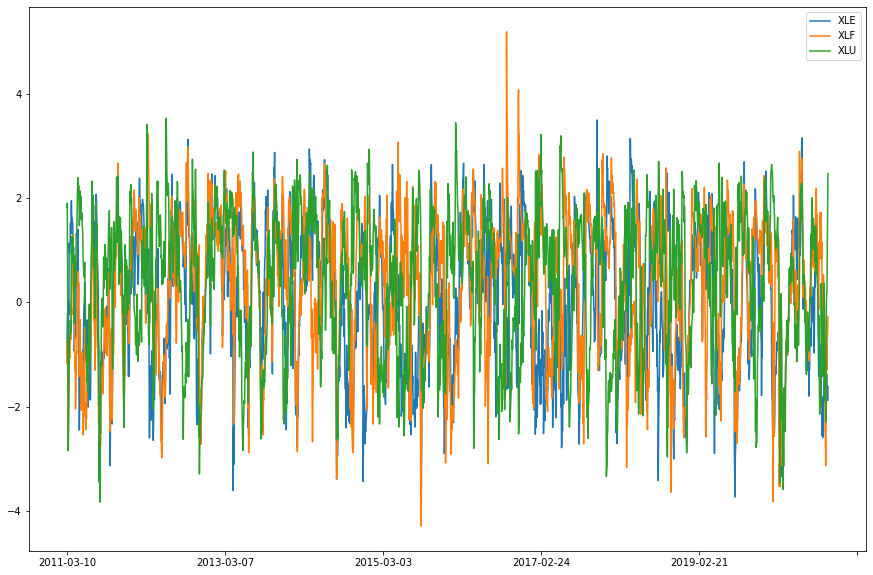

In [23]:
data[["XLE","XLF","XLU"]].plot(figsize=(15, 10))

In [25]:
from statsmodels.tsa.vector_ar.svar_model import SVAR
